In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('white')
sns.set_palette("husl")

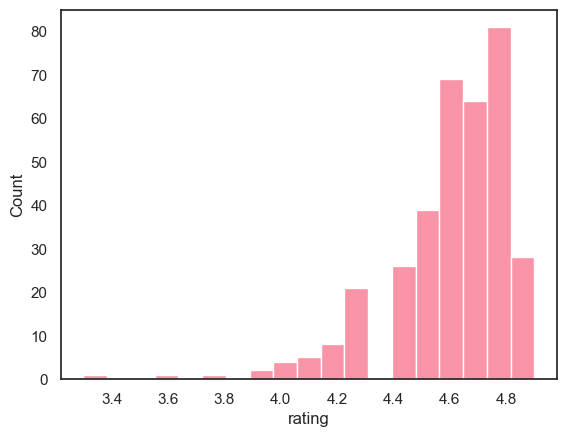

In [3]:
books = pd.read_csv('clean_books.csv')

sns.histplot(data=books, x='rating')
plt.show()

In [4]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [5]:
unemployment = pd.read_csv('clean_unemployment.csv')
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


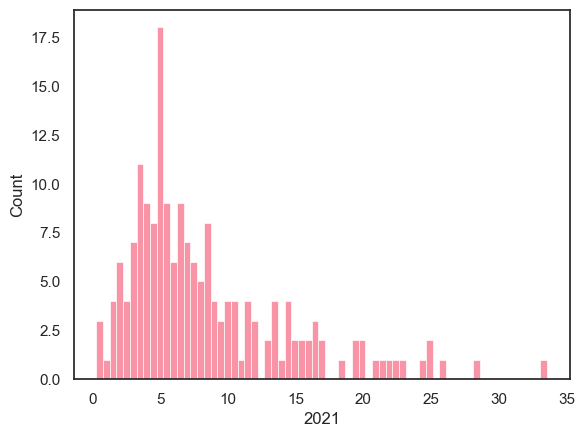

In [6]:
sns.histplot(data=unemployment, x='2021', binwidth=0.5)
plt.show()

In [7]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [8]:
books[~books['genre'].isin(['Fiction', 'Non Fiction'])].head()

,name,author,rating,year,genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
26,Baby Touch and Feel: Animals,DK,4.6,2015,Childrens
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2017,Childrens
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,2011,Childrens
53,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,2015,Childrens


In [9]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [10]:
books['year'].min()
books["year"].max()
books["year"].mean()

np.float64(2013.5085714285715)

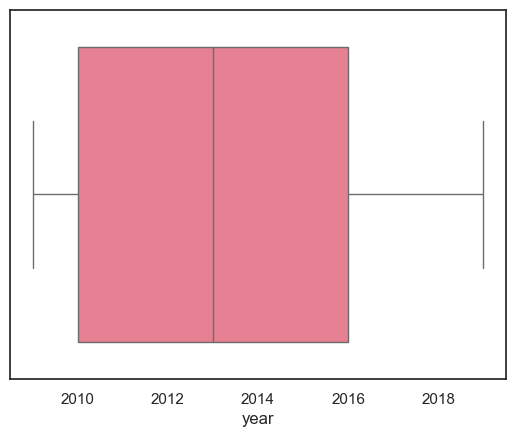

In [11]:
sns.boxplot(data=books, x="year")
plt.show()

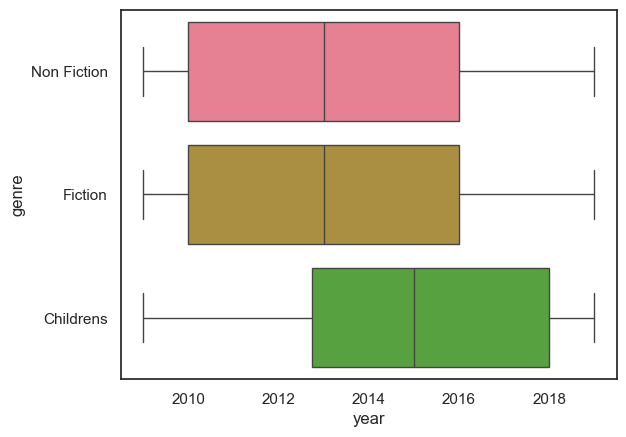

In [12]:
sns.boxplot(data=books, x="year", y="genre", hue="genre")
# plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Fiction', 'Non Fiction', 'Childrens'])
plt.show()

In [13]:
unemployment = pd.read_csv('clean_unemployment.csv')
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [14]:
not_oceania = ~unemployment['continent'].isin(['Oceania'])
unemployment[not_oceania].head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [15]:
print(unemployment['2021'].min(), "and", unemployment['2021'].max())

0.26 and 33.56


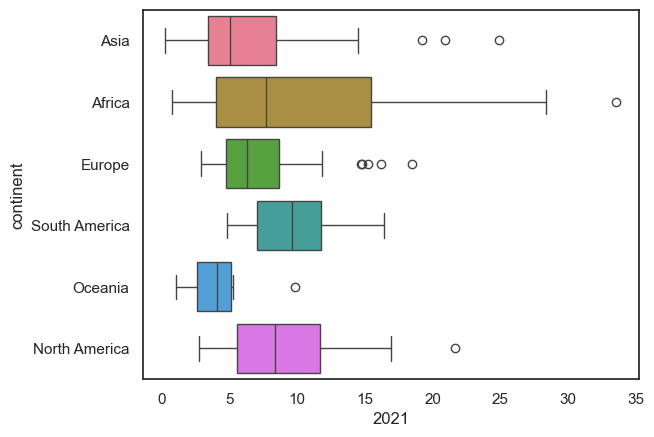

In [16]:
sns.boxplot(data=unemployment, x="2021", y="continent", hue="continent", legend=False)
plt.show()

In [17]:
books.groupby("genre").mean(numeric_only=True).reset_index()

,genre,rating,year
0,Childrens,4.780000,2015.075000
1,Fiction,4.570229,2013.022901
2,Non Fiction,4.598324,2013.513966


In [18]:
books[['rating', 'year']].agg(['mean', 'median', 'std'], numeric_only=True)

,rating,year
mean,4.608571,2013.508571
median,4.600000,2013.000000
std,0.226941,3.284711


In [19]:
books.agg({"rating": ['mean', 'median', 'std'], "year": [ 'median']})

,rating,year
mean,4.608571,NaN
median,4.600000,2013.0
std,0.226941,NaN


In [20]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
).reset_index('genre')

,genre,mean_rating,std_rating,median_year
0,Childrens,4.780000,0.122370,2015.0
1,Fiction,4.570229,0.281123,2013.0
2,Non Fiction,4.598324,0.179411,2013.0


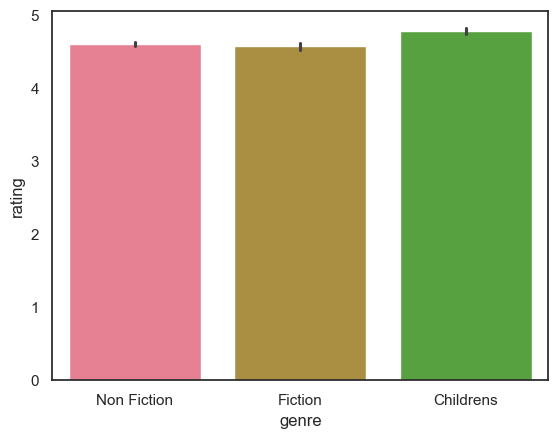

In [21]:
sns.barplot(data=books, x="genre", y="rating", hue="genre")
plt.show()

In [22]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


In [23]:
numeric_cols = list(unemployment.select_dtypes(include=np.number).columns)
unemployment[numeric_cols].agg(["mean", "std"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [24]:
unemployment.groupby("continent")[numeric_cols].agg(["mean", "std"])

2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

In [25]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021', 'std'),
)
display(continent_summary)

,mean_rate_2021,std_rate_2021
continent,,
Africa,10.473585,8.131636
Asia,6.906170,5.414745
Europe,7.414872,3.947825
North America,9.155000,5.076482
Oceania,4.280000,2.671522
South America,9.924167,3.611624


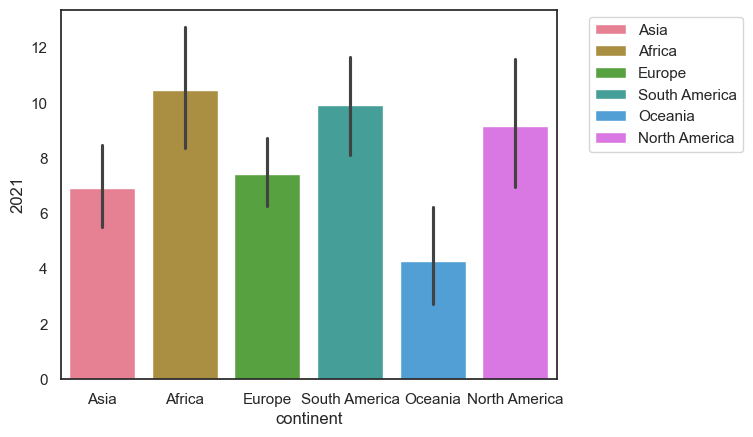

In [26]:
sns.barplot(data=unemployment, x="continent", y="2021", hue="continent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
# Clean data set
salaries = pd.read_csv('ds_salaries_clean.csv')
print(salaries.isna().sum())
print(salaries.describe())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64
       Working_Year  Remote_Working_Ratio     Salary_USD
count    607.000000             607.00000     607.000000
mean    2021.405272              70.92257  107225.836903
std        0.692133              40.70913   67752.393254
min     2020.000000               0.00000    2730.000000
25%     2021.000000              50.00000   59893.000000
50%     2022.000000             100.00000   96982.000000
75%     2022.000000             100.00000  143225.000000
max     2022.000000             100.00000  572900.000000


In [28]:
threshold = len(salaries) * 0.05
print(threshold)

30.35


In [29]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [30]:
salaries.dropna(subset=cols_to_drop, inplace=True)

In [31]:
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

Index([], dtype='object')


In [32]:
for col in cols_with_missing_values[:1]:
    salaries[col].fillna(salaries[col].mode()[0])

In [33]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


In [34]:
planes = pd.read_csv("Airlines_unclean.csv", index_col=0)

In [35]:
# Count the number of missing values in each column
# print columns with missing values before dropping
print(planes.isna().sum())
print("------------------------------------------")

# Find the five percent threshold
threshold = len(planes) * 0.05
print("Threshold =", threshold)
print("------------------------------------------")

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

# print columns with missing values again after dropping
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
------------------------------------------
Threshold = 533.0
------------------------------------------
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


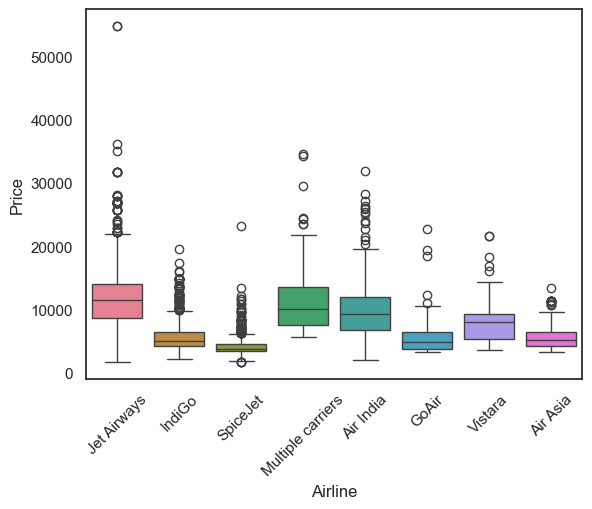

In [36]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price', hue='Airline')
sns.set(rc={"figure.figsize":(8, 6)}) #width=8, #height=6
plt.xticks(rotation = 45)
plt.show()

In [37]:
planes = planes.drop(columns=['Additional_Info'])
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Price              368
dtype: int64


In [38]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('============================================')

# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)
print('============================================')

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [39]:
display(salaries.select_dtypes("object").head())

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [40]:
display(salaries["Designation"].value_counts())

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [41]:
display(salaries["Designation"].describe())

count                607
unique                50
top       Data Scientist
freq                 143
Name: Designation, dtype: object

In [42]:
display(salaries["Designation"].nunique())

50

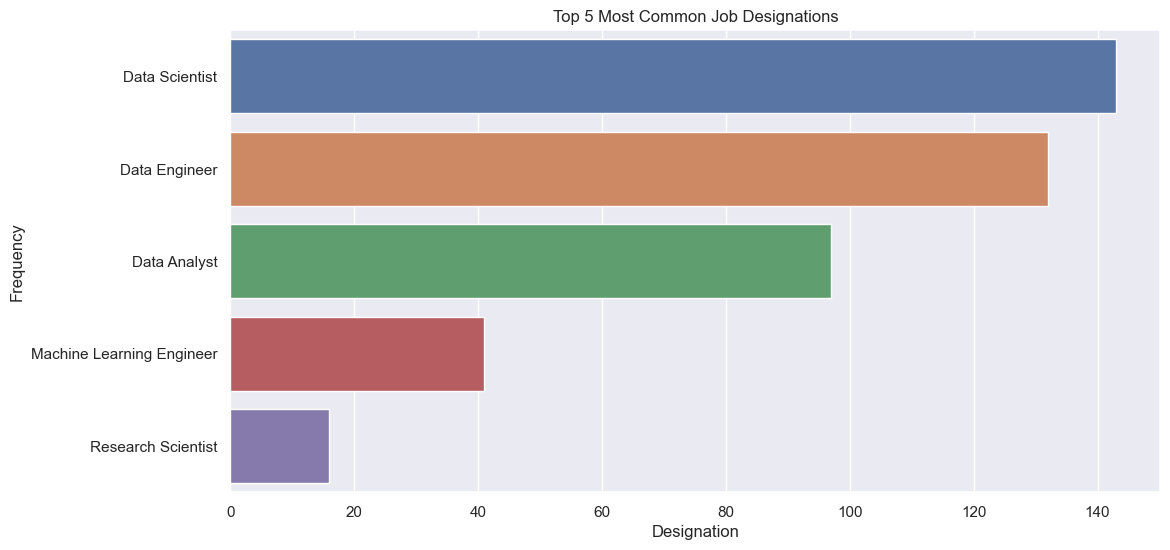

In [43]:
data = salaries["Designation"].value_counts().head(5)
plt.figure(figsize=(12, 6))  # Width = 10, Height = 6
sns.barplot(y=data.index, x=data.values, hue=data.index)
plt.title("Top 5 Most Common Job Designations")
plt.ylabel("Frequency")
plt.xlabel("Designation")
plt.show()


In [44]:
salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [45]:
job_categories = ['Data Science','Data Analytics',
                  'Data Engineering','Machine Learning',
                  'Managerial', 'Consultant']
data_science = 'Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant)),
]

In [46]:
salaries["Job_Category"] = np.select(conditions,
                                     job_categories,
                                     default="Other")
display(salaries[['Designation', 'Job_Category']].head())

,Designation,Job_Category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Data Science
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


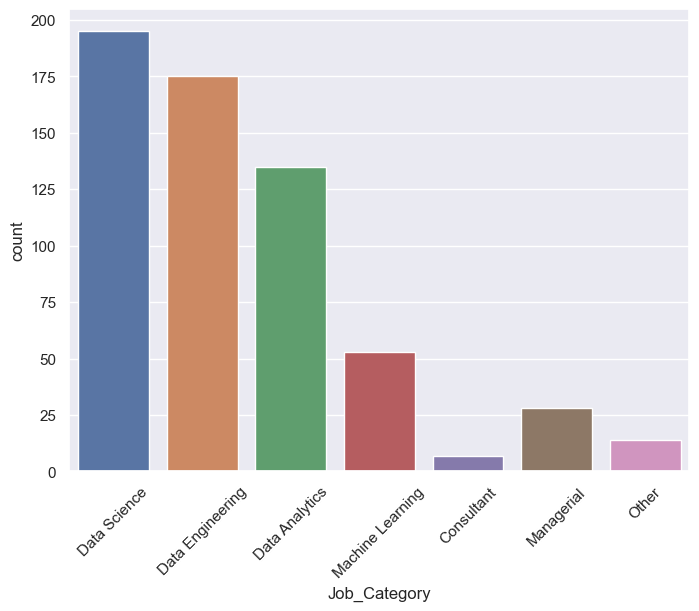

In [47]:
sns.countplot(data=salaries, x="Job_Category", hue="Job_Category")
plt.xticks(rotation=45)
plt.show()

In [48]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
    # Print the number of unique values
    print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  40
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


In [49]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

  Duration Duration_Category
0      19h      Extreme-haul
1   5h 25m       Medium-haul
2   4h 45m        Short-haul
3   2h 25m        Short-haul
4  15h 30m         Long-haul
5   21h 5m      Extreme-haul
6  25h 30m      Extreme-haul
7   7h 50m       Medium-haul
8  13h 15m         Long-haul
9   2h 35m        Short-haul


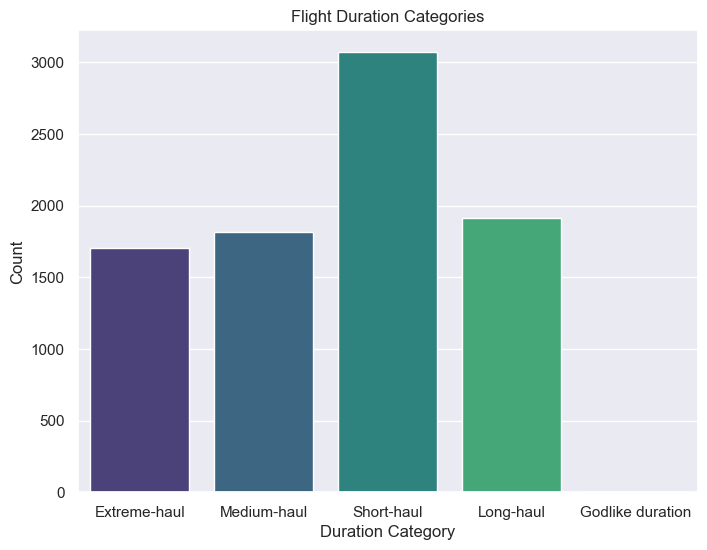

In [50]:
flight_categories = ['Extreme-haul',"Long-haul", "Medium-haul", "Short-haul"]
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains("17h|18h|19h|20h|21h|22h|23h|24h|25h|26h|27h|28h")),
    (planes["Duration"].str.contains("10h|11h|12h|13h|14h|15h|16h")),
    (planes["Duration"].str.contains("5h|6h|7h|8h|9h")),
    (planes["Duration"].str.contains('0h|1h|2h|3h|4h'))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories, 
                                        default="Godlike duration")

# Plot the counts of each category
print(planes[['Duration','Duration_Category']].head(10))
plt.figure(figsize=(8, 6))
sns.countplot(data=planes, x="Duration_Category", palette="viridis", hue="Duration_Category")
plt.title("Flight Duration Categories")
plt.xlabel("Duration Category")
plt.ylabel("Count")
plt.show()


In [51]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
 8   Job_Category          607 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB


In [52]:
print(salaries["Salary_USD"].head())

0     76227.0
1    248257.0
2    104100.0
3     19097.0
4    143225.0
Name: Salary_USD, dtype: float64


In [53]:
display(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [54]:
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")

planes["Duration"] = planes["Duration"].astype("float")
planes["Duration"].head()

0    19.00
1     5.25
2     4.45
3     2.25
4    15.30
Name: Duration, dtype: float64

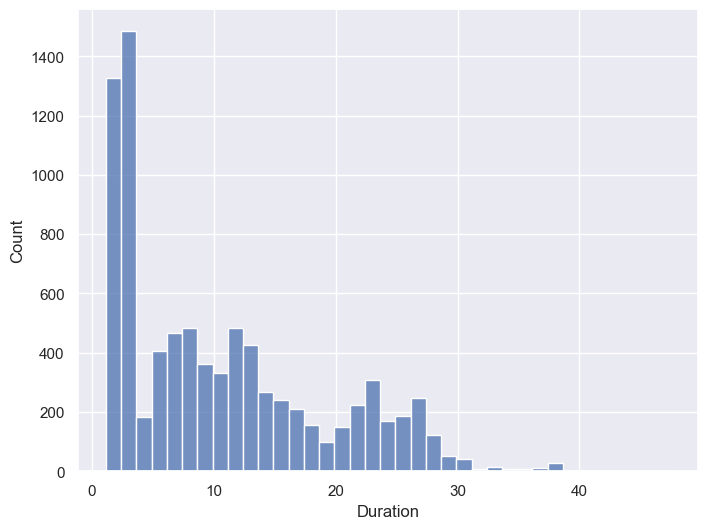

In [55]:
sns.histplot(data=planes, x="Duration")
plt.show()

In [56]:
planes["airline_prices_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())
display(planes[["Airline", "airline_prices_st_dev"]].value_counts())

Airline            airline_prices_st_dev
Jet Airways        4159.846432              3082
IndiGo             2245.529140              1632
Air India          3692.609285              1399
Multiple carriers  3558.323763               959
SpiceJet           1798.900648               653
Vistara            2888.915498               376
Air Asia           1979.826234               260
GoAir              2764.926625               147
Name: count, dtype: int64

In [57]:
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())
display(planes[["Airline", "airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.20                      3082
IndiGo             2.55                       1632
Air India          15.50                      1399
Multiple carriers  10.15                       959
SpiceJet           2.30                        653
Vistara            3.10                        376
Air Asia           2.50                        260
GoAir              2.55                        147
Name: count, dtype: int64

In [58]:
planes["price_destination_mean"] = planes.groupby(["Destination"])["Price"].transform(lambda x: x.mean())
print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


In [59]:
display(salaries["Salary_USD"].describe())

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

<Axes: ylabel='Salary_USD'>

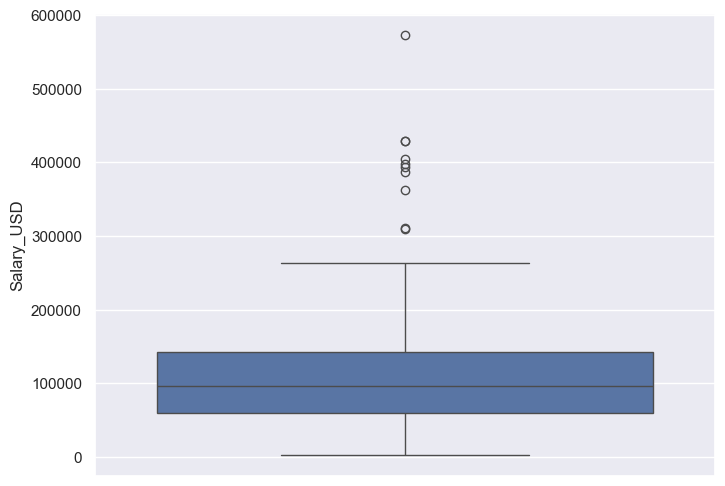

In [60]:
sns.boxplot(data=salaries, y="Salary_USD")

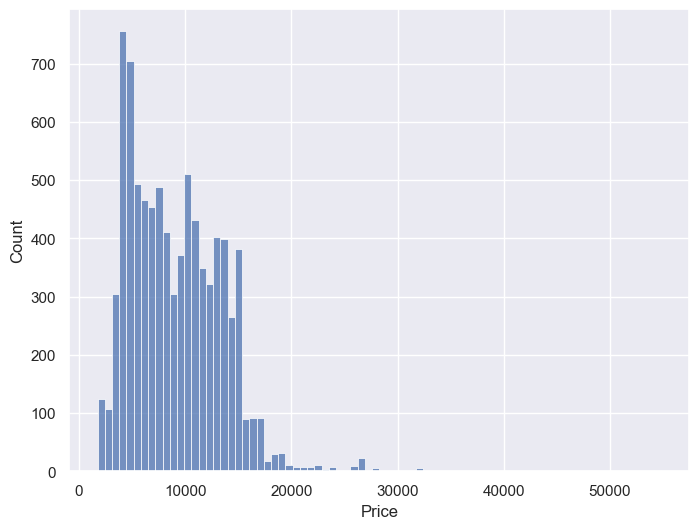

In [61]:
sns.histplot(data=planes, x="Price")
plt.show()

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


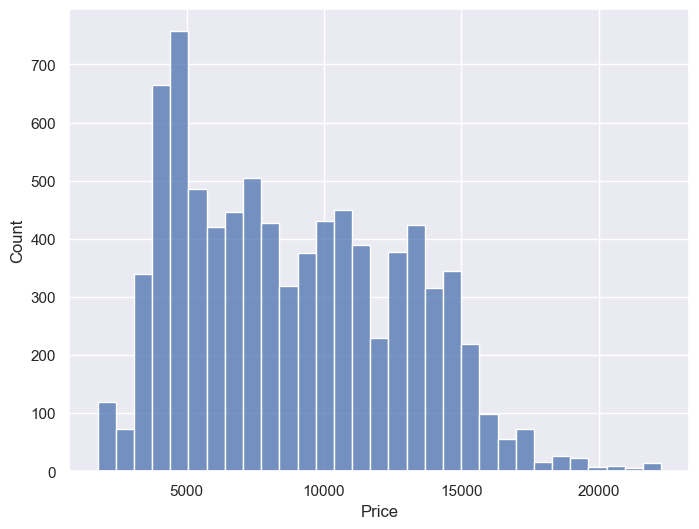

In [62]:
price_seventy_fifth = planes["Price"].quantile(0.75)

price_twenty_fifth = planes["Price"].quantile(0.25)

prices_iqr = price_seventy_fifth - price_twenty_fifth

upper = price_seventy_fifth + (1.5 * prices_iqr)

lower = price_twenty_fifth - (1.5 * prices_iqr)

planes_no_outlier = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

sns.histplot(data=planes_no_outlier, x="Price")
plt.show()